In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [2]:
#Importamos los dataset de ciudad de buenos aires de recorridos 
recorridos2020 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2020.csv', delimiter=',',low_memory=False)

In [3]:
recorridos2019 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2019.csv', delimiter=',',low_memory=False)

In [4]:
recorridos2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2018.csv', delimiter=',',low_memory=False)

In [5]:
recorridos2020

,Unnamed: 0,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista
0,0.0,349,75,2020-09-14 11:52:21,075 - Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,186 - MANZANA 66,155721
1,1.0,85,210,2020-09-14 11:51:41,335 - General Urquiza,2020-09-14 11:53:06,210.0,335 - General Urquiza,191320
2,2.0,311,213,2020-09-14 11:51:12,136 - Acevedo,2020-09-14 11:56:23,99.0,099 - Malabia,86663
3,3.0,454,156,2020-09-14 11:50:38,156 - Plaza Alemania,2020-09-14 11:58:12,222.0,160 - Godoy Cruz y Libertador,193914
4,4.0,195,24,2020-09-14 11:49:31,024 - ALSINA,2020-09-14 11:52:46,441.0,016 - Legislatura,448950
...,...,...,...,...,...,...,...,...,...
1438850,NaN,1089,9,2020-05-11 10:14:47,009 - Parque Las Heras,2020-05-11 10:32:56,9.0,009 - Parque Las Heras,5368
1438851,NaN,290,104,2020-05-11 07:54:14,104 - Federico Lacroze,2020-05-11 07:59:04,127.0,127 - SANTOS DUMONT Y OTERO,250224
1438852,NaN,2,206,2020-03-21 18:53:26,159 - Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,287 - Belaustegui,60667
1438853,NaN,2,206,2020-03-21 13:16:27,159 - Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,159 - Fitz Roy & Gorriti,60667


In [6]:
#La columna de duracion esta en segundos
#Al parecer la columna unnamed es un indice que no necesitamos
recorridos2020["Unnamed: 0"].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.61103e+05,
       5.61104e+05,         nan])

In [7]:
##Dejar solo el texto en los nombres de estaciones inicio y fin, o sea sacar numeros -
recorridos2020['Nombre_estacion_inicio']=recorridos2020['Nombre de estación de inicio'].str.slice(start=6)
recorridos2020['Nombre_estacion_final']=recorridos2020['Nombre de estación de fin de viaje'].str.slice(start=6)
recorridos2020

,Unnamed: 0,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Nombre_estacion_inicio,Nombre_estacion_final
0,0.0,349,75,2020-09-14 11:52:21,075 - Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,186 - MANZANA 66,155721,Plaza Primero de Mayo,MANZANA 66
1,1.0,85,210,2020-09-14 11:51:41,335 - General Urquiza,2020-09-14 11:53:06,210.0,335 - General Urquiza,191320,General Urquiza,General Urquiza
2,2.0,311,213,2020-09-14 11:51:12,136 - Acevedo,2020-09-14 11:56:23,99.0,099 - Malabia,86663,Acevedo,Malabia
3,3.0,454,156,2020-09-14 11:50:38,156 - Plaza Alemania,2020-09-14 11:58:12,222.0,160 - Godoy Cruz y Libertador,193914,Plaza Alemania,Godoy Cruz y Libertador
4,4.0,195,24,2020-09-14 11:49:31,024 - ALSINA,2020-09-14 11:52:46,441.0,016 - Legislatura,448950,ALSINA,Legislatura
...,...,...,...,...,...,...,...,...,...,...,...
1438850,NaN,1089,9,2020-05-11 10:14:47,009 - Parque Las Heras,2020-05-11 10:32:56,9.0,009 - Parque Las Heras,5368,Parque Las Heras,Parque Las Heras
1438851,NaN,290,104,2020-05-11 07:54:14,104 - Federico Lacroze,2020-05-11 07:59:04,127.0,127 - SANTOS DUMONT Y OTERO,250224,Federico Lacroze,SANTOS DUMONT Y OTERO
1438852,NaN,2,206,2020-03-21 18:53:26,159 - Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,287 - Belaustegui,60667,Fitz Roy & Gorriti,Belaustegui
1438853,NaN,2,206,2020-03-21 13:16:27,159 - Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,159 - Fitz Roy & Gorriti,60667,Fitz Roy & Gorriti,Fitz Roy & Gorriti


In [8]:
recorridos2020reor = recorridos2020[['Duración','Id de estación de inicio','Fecha de inicio','Nombre_estacion_inicio','Fecha de fin','Id de estación de fin de viaje','Nombre_estacion_final','ID de ciclista']]
recorridos2020reor

,Duración,Id de estación de inicio,Fecha de inicio,Nombre_estacion_inicio,Fecha de fin,Id de estación de fin de viaje,Nombre_estacion_final,ID de ciclista
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,MANZANA 66,155721
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210.0,General Urquiza,191320
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99.0,Malabia,86663
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222.0,Godoy Cruz y Libertador,193914
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441.0,Legislatura,448950
...,...,...,...,...,...,...,...,...
1438850,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,9.0,Parque Las Heras,5368
1438851,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,127.0,SANTOS DUMONT Y OTERO,250224
1438852,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,Belaustegui,60667
1438853,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,Fitz Roy & Gorriti,60667


In [9]:
#vemos la cantidad de nulos que tiene el dataset recorridos2020reor
nulosrecorridos2020reor = (recorridos2020reor.isnull().sum()/recorridos2020reor.isnull().count()).sort_values(ascending=False)
nulosrecorridos2020reor.head(20)

Nombre_estacion_final             0.000001
Id de estación de fin de viaje    0.000001
ID de ciclista                    0.000000
Fecha de fin                      0.000000
Nombre_estacion_inicio            0.000000
Fecha de inicio                   0.000000
Id de estación de inicio          0.000000
Duración                          0.000000
dtype: float64

In [10]:
#eliminamos nulos
recorridos2020final=recorridos2020reor.dropna()
recorridos2020final

,Duración,Id de estación de inicio,Fecha de inicio,Nombre_estacion_inicio,Fecha de fin,Id de estación de fin de viaje,Nombre_estacion_final,ID de ciclista
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,MANZANA 66,155721
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210.0,General Urquiza,191320
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99.0,Malabia,86663
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222.0,Godoy Cruz y Libertador,193914
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441.0,Legislatura,448950
...,...,...,...,...,...,...,...,...
1438850,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,9.0,Parque Las Heras,5368
1438851,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,127.0,SANTOS DUMONT Y OTERO,250224
1438852,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,Belaustegui,60667
1438853,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,Fitz Roy & Gorriti,60667


In [11]:
#Vamos a ver como estan los ID
print(sorted(recorridos2020final['Id de estación de fin de viaje'].unique()))

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 13.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 101.0, 102.0, 104.0, 105.0, 106.0, 107.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 117.0, 118.0, 120.0, 121.0, 122.0, 124.0, 126.0, 127.0, 128.0, 130.0, 131.0, 132.0, 134.0, 135.0, 137.0, 138.0, 141.0, 143.0, 144.0, 146.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 170.0, 171.0, 172.0, 174.0, 175.0, 176.0, 177.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.

In [12]:
print(sorted(recorridos2020final['Id de estación de inicio'].unique()))

[2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 35, 36, 38, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 54, 56, 58, 59, 60, 63, 64, 65, 66, 69, 70, 71, 73, 74, 75, 76, 79, 80, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96, 98, 99, 101, 104, 105, 107, 111, 112, 114, 116, 117, 118, 120, 121, 122, 124, 126, 128, 130, 131, 132, 134, 135, 137, 138, 144, 146, 149, 150, 151, 152, 153, 155, 156, 158, 161, 162, 163, 164, 165, 166, 167, 168, 171, 172, 174, 175, 179, 180, 181, 182, 183, 184, 186, 187, 189, 190, 191, 193, 194, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 210, 212, 213, 214, 215, 216, 220, 222, 223, 227, 229, 231, 235, 236, 239, 241, 242, 247, 248, 252, 254, 255, 257, 258, 261, 262, 263, 268, 269, 271, 273, 275, 277, 278, 280, 281, 284, 289, 291, 295, 299, 302, 308, 316, 318, 322, 323, 329, 335, 336, 343, 353, 355, 358, 359, 361, 364, 369, 376, 381, 387, 392, 397, 416, 424, 426, 429, 432, 433, 435, 436, 441, 444, 448, 449]


In [13]:
recorridos2020final['Id de estación de fin de viaje'].dtype

dtype('float64')

In [14]:
recorridos2020final['Id de estación de fin de viaje int'] =recorridos2020final['Id de estación de fin de viaje'].astype(np.int64)
recorridos2020final

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Duración,Id de estación de inicio,Fecha de inicio,Nombre_estacion_inicio,Fecha de fin,Id de estación de fin de viaje,Nombre_estacion_final,ID de ciclista,Id de estación de fin de viaje int
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,MANZANA 66,155721,186
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210.0,General Urquiza,191320,210
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99.0,Malabia,86663,99
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222.0,Godoy Cruz y Libertador,193914,222
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441.0,Legislatura,448950,441
...,...,...,...,...,...,...,...,...,...
1438850,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,9.0,Parque Las Heras,5368,9
1438851,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,127.0,SANTOS DUMONT Y OTERO,250224,127
1438852,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,Belaustegui,60667,367
1438853,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,Fitz Roy & Gorriti,60667,206


In [15]:
recorridos2020final=recorridos2020final.drop(columns=['Id de estación de fin de viaje'])
recorridos2020final

,Duración,Id de estación de inicio,Fecha de inicio,Nombre_estacion_inicio,Fecha de fin,Nombre_estacion_final,ID de ciclista,Id de estación de fin de viaje int
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,MANZANA 66,155721,186
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,General Urquiza,191320,210
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,Malabia,86663,99
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,Godoy Cruz y Libertador,193914,222
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,Legislatura,448950,441
...,...,...,...,...,...,...,...,...
1438850,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,Parque Las Heras,5368,9
1438851,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,SANTOS DUMONT Y OTERO,250224,127
1438852,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,Belaustegui,60667,367
1438853,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,Fitz Roy & Gorriti,60667,206


In [16]:
recorridos2020final = recorridos2020final[['Duración','Id de estación de inicio','Fecha de inicio','Nombre_estacion_inicio','Fecha de fin','Id de estación de fin de viaje int','Nombre_estacion_final','ID de ciclista']]
recorridos2020final

,Duración,Id de estación de inicio,Fecha de inicio,Nombre_estacion_inicio,Fecha de fin,Id de estación de fin de viaje int,Nombre_estacion_final,ID de ciclista
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186,MANZANA 66,155721
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210,General Urquiza,191320
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99,Malabia,86663
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222,Godoy Cruz y Libertador,193914
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441,Legislatura,448950
...,...,...,...,...,...,...,...,...
1438850,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,9,Parque Las Heras,5368
1438851,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,127,SANTOS DUMONT Y OTERO,250224
1438852,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,367,Belaustegui,60667
1438853,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,206,Fitz Roy & Gorriti,60667


In [17]:
#Vamos a traernos barrios y latitudes y longitudes de las estaciones
estaciones = pd.read_excel(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\estacionesbicicletasfull.xlsx')
estaciones

,lat,long,id_estacion,capacidad,Nombre,barrio
0,-34.583133,-58.392452,1,0,Facultad de Derecho,Recoleta
1,-34.592589,-58.374822,2,0,Retiro,Retiro
2,-34.611032,-58.368260,3,20,ADUANA,Monserrat
3,-34.601726,-58.368763,4,20,Plaza Roma,San nicolas
4,-34.580550,-58.420954,5,42,Plaza Italia,Palermo
...,...,...,...,...,...,...
266,-34.544597,-58.459554,435,16,lub Ciudad de,NuÃ±ez
267,-34.610012,-58.374919,441,20,Legislatura,Monserrat
268,-34.608678,-58.371008,444,24,nisterio de Ec,San nicolas
269,-34.582618,-58.378731,448,24,Barrio 31,Retiro


In [18]:
recorridos2020final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

In [19]:
recorridos2020final=recorridos2020final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2020final.rename(columns={'barrio': 'barrio_origen', 'capacidad': 'capacidad_origen','lat':'lat_origen','long':'long_origen'}, inplace=True)
recorridos2020final=recorridos2020final.drop(columns=['id_estacion'])
recorridos2020final=recorridos2020final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2020final.rename(columns={'barrio': 'barrio_destino', 'capacidad': 'capacidad_destino','lat':'lat_destino','long':'long_destino'}, inplace=True)
recorridos2020final=recorridos2020final.drop(columns=['id_estacion'])

In [20]:
#Importamos un calendario para saber en que dia de la semana se encuentra cada fecha
calendario = pd.read_excel(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\TablaCalendario.xlsx')
calendario

,DiaSem,Fecha
0,Lunes,2018-01-01
1,Martes,2018-01-02
2,Miercoles,2018-01-03
3,Jueves,2018-01-04
4,Viernes,2018-01-05
...,...,...
1091,Domingo,2020-12-27
1092,Lunes,2020-12-28
1093,Martes,2020-12-29
1094,Miercoles,2020-12-30


In [21]:
#Uno el dataet de recorridos 2020 con el calendario
recorridos2020final['Fecha_str']=recorridos2020final['fecha_origen_recorrido'].apply(str).str.slice(stop=10)
recorridos2020final = recorridos2020final.merge(calendario, how= 'left' , left_on = ['Fecha_str'], right_on=['Fecha'])
recorridos2020final=recorridos2020final.drop(columns=['Fecha'])
recorridos2020final

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,barrio_destino,capacidad_destino,lat_destino,long_destino,Fecha_str,DiaSem
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186,MANZANA 66,155721,Balvanera,20.0,-34.612298,-58.398987,Balvanera,20.0,-34.612298,-58.398987,2020-09-14,Lunes
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210,General Urquiza,191320,Palermo,20.0,-34.572132,-58.411323,Palermo,20.0,-34.572132,-58.411323,2020-09-14,Lunes
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99,Malabia,86663,Villa crespo,20.0,-34.599565,-58.442536,Villa crespo,20.0,-34.599565,-58.442536,2020-09-14,Lunes
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222,Godoy Cruz y Libertador,193914,Palermo,20.0,-34.577590,-58.407470,Palermo,20.0,-34.577590,-58.407470,2020-09-14,Lunes
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441,Legislatura,448950,Monserrat,18.0,-34.610583,-58.380894,Monserrat,18.0,-34.610583,-58.380894,2020-09-14,Lunes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438848,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,9,Parque Las Heras,5368,Palermo,24.0,-34.585443,-58.407741,Palermo,24.0,-34.585443,-58.407741,2020-05-11,Lunes
1438849,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,127,SANTOS DUMONT Y OTERO,250224,Chacarita,30.0,-34.587617,-58.455212,Chacarita,30.0,-34.587617,-58.455212,2020-05-11,Lunes
1438850,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,367,Belaustegui,60667,Palermo,16.0,-34.584912,-58.437252,Palermo,16.0,-34.584912,-58.437252,2020-03-21,Sabado
1438851,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,206,Fitz Roy & Gorriti,60667,Palermo,16.0,-34.584912,-58.437252,Palermo,16.0,-34.584912,-58.437252,2020-03-21,Sabado


In [22]:
#Vamos a trabajar con la fecha de inicio 
recorridos2020final.fecha_origen_recorrido = pd.to_datetime(recorridos2020final.fecha_origen_recorrido) 
recorridos2020final['anio'] = recorridos2020final.fecha_origen_recorrido.dt.year
recorridos2020final['mes'] = recorridos2020final.fecha_origen_recorrido.dt.month
recorridos2020final['dia'] = recorridos2020final.fecha_origen_recorrido.dt.day
recorridos2020final['franja_horaria'] = recorridos2020final.fecha_origen_recorrido.dt.hour 

recorridos2020final.head()

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,barrio_origen,capacidad_origen,...,barrio_destino,capacidad_destino,lat_destino,long_destino,Fecha_str,DiaSem,anio,mes,dia,franja_horaria
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186,MANZANA 66,155721,Balvanera,20.0,...,Balvanera,20.0,-34.612298,-58.398987,2020-09-14,Lunes,2020,9,14,11
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210,General Urquiza,191320,Palermo,20.0,...,Palermo,20.0,-34.572132,-58.411323,2020-09-14,Lunes,2020,9,14,11
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99,Malabia,86663,Villa crespo,20.0,...,Villa crespo,20.0,-34.599565,-58.442536,2020-09-14,Lunes,2020,9,14,11
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222,Godoy Cruz y Libertador,193914,Palermo,20.0,...,Palermo,20.0,-34.577590,-58.407470,2020-09-14,Lunes,2020,9,14,11
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441,Legislatura,448950,Monserrat,18.0,...,Monserrat,18.0,-34.610583,-58.380894,2020-09-14,Lunes,2020,9,14,11


In [23]:
#Concatenamos año y mes 
recorridos2020final['aniomes'] = recorridos2020final['anio'].apply(str) +'-'+recorridos2020final['mes'].apply(str)

In [24]:
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
recorridos2020final["nombre_estacion_origen_min"] = recorridos2020final["nombre_estacion_origen"].str.lower()
recorridos2020final["nombre_estacion_destino_min"]= recorridos2020final["nombre_estacion_destino"].str.lower()
recorridos2020final=recorridos2020final.drop(columns=['nombre_estacion_origen','nombre_estacion_destino'])
recorridos2020final

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,fecha_destino_recorrido,id_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,...,long_destino,Fecha_str,DiaSem,anio,mes,dia,franja_horaria,aniomes,nombre_estacion_origen_min,nombre_estacion_destino_min
0,349,75,2020-09-14 11:52:21,2020-09-14 11:58:10,186,155721,Balvanera,20.0,-34.612298,-58.398987,...,-58.398987,2020-09-14,Lunes,2020,9,14,11,2020-9,plaza primero de mayo,manzana 66
1,85,210,2020-09-14 11:51:41,2020-09-14 11:53:06,210,191320,Palermo,20.0,-34.572132,-58.411323,...,-58.411323,2020-09-14,Lunes,2020,9,14,11,2020-9,general urquiza,general urquiza
2,311,213,2020-09-14 11:51:12,2020-09-14 11:56:23,99,86663,Villa crespo,20.0,-34.599565,-58.442536,...,-58.442536,2020-09-14,Lunes,2020,9,14,11,2020-9,acevedo,malabia
3,454,156,2020-09-14 11:50:38,2020-09-14 11:58:12,222,193914,Palermo,20.0,-34.577590,-58.407470,...,-58.407470,2020-09-14,Lunes,2020,9,14,11,2020-9,plaza alemania,godoy cruz y libertador
4,195,24,2020-09-14 11:49:31,2020-09-14 11:52:46,441,448950,Monserrat,18.0,-34.610583,-58.380894,...,-58.380894,2020-09-14,Lunes,2020,9,14,11,2020-9,alsina,legislatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438848,1089,9,2020-05-11 10:14:47,2020-05-11 10:32:56,9,5368,Palermo,24.0,-34.585443,-58.407741,...,-58.407741,2020-05-11,Lunes,2020,5,11,10,2020-5,parque las heras,parque las heras
1438849,290,104,2020-05-11 07:54:14,2020-05-11 07:59:04,127,250224,Chacarita,30.0,-34.587617,-58.455212,...,-58.455212,2020-05-11,Lunes,2020,5,11,7,2020-5,federico lacroze,santos dumont y otero
1438850,2,206,2020-03-21 18:53:26,2020-03-21 18:53:28,367,60667,Palermo,16.0,-34.584912,-58.437252,...,-58.437252,2020-03-21,Sabado,2020,3,21,18,2020-3,fitz roy & gorriti,belaustegui
1438851,2,206,2020-03-21 13:16:27,2020-03-21 13:16:29,206,60667,Palermo,16.0,-34.584912,-58.437252,...,-58.437252,2020-03-21,Sabado,2020,3,21,13,2020-3,fitz roy & gorriti,fitz roy & gorriti


In [25]:
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,0 days 00:07:02.000000000,2019-01-01 00:08:18,112.0,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,0 days 00:05:33.000000000,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:45.000000000,2019-01-01 00:29:00,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:34.000000000,2019-01-01 00:29:02,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,0 days 00:21:32.000000000,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:13:58.000000000,2019-11-16 16:59,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:26:56.000000000,2019-11-24 13:51,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:25:06.000000000,2019-12-22 13:54,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:23:43.000000000,2019-12-18 14:04,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo


In [26]:
##Corregir ID usuarios con _0
recorteid  = recorridos2019['id_usuario'].str.split("_", n=2, expand=True) 
recorridos2019['id_usuario_c']=recorteid[0]

##Corregir ID estaciones con _0
recorteiddestino=recorridos2019['id_estacion_destino'].str.split("_", n=2, expand=True) 
recorridos2019['id_estacion_destino_c']=recorteiddestino[0]
recorteidorigen=recorridos2019['id_estacion_origen'].str.split("_", n=2, expand=True) 
recorridos2019['id_estacion_origen_c']=recorteidorigen[0]

In [27]:
#Dejar solo texto en nombres estaciones con numero -
recorte_estorigen=recorridos2019['nombre_estacion_origen'].str.split("-",n=1,expand=True)
recorte_estorigen['largo']=recorte_estorigen[0].str.len()
recorte_estorigen

,0,1,largo
0,Estados Unidos,None,14.0
1,Colegio Nacional Buenos Aires,None,29.0
2,Pueyrredón,None,10.0
3,Pueyrredón,None,10.0
4,Legislatura,None,11.0
...,...,...,...
6367309,321,PERITO MORENO,4.0
6367310,321,PERITO MORENO,4.0
6367311,321,PERITO MORENO,4.0
6367312,321,PERITO MORENO,4.0


In [28]:
recorte_estorigen.loc[recorte_estorigen['largo']==4, 'final'] = recorte_estorigen[1]
recorte_estorigen.loc[recorte_estorigen['largo']!=4, 'final'] = recorte_estorigen[0]
recorte_estorigen

,0,1,largo,final
0,Estados Unidos,None,14.0,Estados Unidos
1,Colegio Nacional Buenos Aires,None,29.0,Colegio Nacional Buenos Aires
2,Pueyrredón,None,10.0,Pueyrredón
3,Pueyrredón,None,10.0,Pueyrredón
4,Legislatura,None,11.0,Legislatura
...,...,...,...,...
6367309,321,PERITO MORENO,4.0,PERITO MORENO
6367310,321,PERITO MORENO,4.0,PERITO MORENO
6367311,321,PERITO MORENO,4.0,PERITO MORENO
6367312,321,PERITO MORENO,4.0,PERITO MORENO


In [29]:
recorridos2019['nombre_estacion_origen_c']=recorte_estorigen['final']
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,...,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio,id_usuario_c,id_estacion_destino_c,id_estacion_origen_c,nombre_estacion_origen_c
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,...,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo,115783,112.0,168.0,Estados Unidos
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,...,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo,345364,47.0,47.0,Colegio Nacional Buenos Aires
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,Ecoparque,NaN,NaN,NaN,NaN,antiguo,570578,44,144.0,Pueyrredón
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,Ecoparque,NaN,NaN,NaN,NaN,antiguo,588687,44,144.0,Pueyrredón
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,...,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo,127201,199.0,16.0,Legislatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,501986,283.0,300.0,PERITO MORENO
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO


In [30]:
#Dejar solo texto en nombres estaciones con numero -
recorte_estdestino=recorridos2019['nombre_estacion_destino'].str.split("-",n=1,expand=True)
recorte_estdestino['largod']=recorte_estdestino[0].str.len()
recorte_estdestino.loc[recorte_estdestino['largod']==4, 'finald'] = recorte_estdestino[1]
recorte_estdestino.loc[recorte_estdestino['largod']!=4, 'finald'] = recorte_estdestino[0]
recorridos2019['nombre_estacion_destino_c']=recorte_estdestino['finald']
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,...,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio,id_usuario_c,id_estacion_destino_c,id_estacion_origen_c,nombre_estacion_origen_c,nombre_estacion_destino_c
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,...,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo,115783,112.0,168.0,Estados Unidos,9 de Julio
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,...,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo,345364,47.0,47.0,Colegio Nacional Buenos Aires,Colegio Nacional Buenos Aires
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,NaN,NaN,NaN,NaN,antiguo,570578,44,144.0,Pueyrredón,Ecoparque
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,NaN,NaN,NaN,NaN,antiguo,588687,44,144.0,Pueyrredón,Ecoparque
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,...,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo,127201,199.0,16.0,Legislatura,Estados Unidos y Boedo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,501986,283.0,300.0,PERITO MORENO,BALDOMERO
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO


In [31]:
#Pasamos la columna de duracion a segundos
recorte  = recorridos2019['duracion_recorrido'].str.split(" ", n=2, expand=True)
duracion0=recorte[2]
duracion=duracion0.str.slice(stop=8)
duracion

0          00:07:02
1          00:05:33
2          00:19:45
3          00:19:34
4          00:21:32
             ...   
6367309    00:13:58
6367310    00:26:56
6367311    00:25:06
6367312    00:23:43
6367313    00:30:16
Name: 2, Length: 6367314, dtype: object

In [32]:
minutos=duracion.str.slice(start=3, stop=5)
horas=duracion.str.slice(stop=2)
segundos=duracion.str.slice(start=6,stop=8)
recorridos2019['dur_hs']=horas
recorridos2019['dur_min']=minutos
recorridos2019['dur_seg']=segundos

In [33]:
recorridos2019['duracion_tot_seg'] = recorridos2019['dur_min'].apply(lambda x: x*60)
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,...,servicio,id_usuario_c,id_estacion_destino_c,id_estacion_origen_c,nombre_estacion_origen_c,nombre_estacion_destino_c,dur_hs,dur_min,dur_seg,duracion_tot_seg
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,...,antiguo,115783,112.0,168.0,Estados Unidos,9 de Julio,00,07,02,0707070707070707070707070707070707070707070707...
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,...,antiguo,345364,47.0,47.0,Colegio Nacional Buenos Aires,Colegio Nacional Buenos Aires,00,05,33,0505050505050505050505050505050505050505050505...
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,antiguo,570578,44,144.0,Pueyrredón,Ecoparque,00,19,45,1919191919191919191919191919191919191919191919...
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,antiguo,588687,44,144.0,Pueyrredón,Ecoparque,00,19,34,1919191919191919191919191919191919191919191919...
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,...,antiguo,127201,199.0,16.0,Legislatura,Estados Unidos y Boedo,00,21,32,2121212121212121212121212121212121212121212121...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,501986,283.0,300.0,PERITO MORENO,BALDOMERO,00,13,58,1313131313131313131313131313131313131313131313...
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO,00,26,56,2626262626262626262626262626262626262626262626...
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO,00,25,06,2525252525252525252525252525252525252525252525...
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO,00,23,43,2323232323232323232323232323232323232323232323...


In [34]:
#Debemos establecer cada componente de la duracion como enteros para poder llevarlo a segundos, para eso no debe haber nulos
#vemos la cantidad de nulos que tiene el dataset recorridos2019 para sacar los nulos de la duracion
nulosrecorridos2019 = (recorridos2019.isnull().sum()/recorridos2019.isnull().count()).sort_values(ascending=False)
nulosrecorridos2019.head(30)

genero_usuario                9.679439e-01
edad_usuario                  9.679439e-01
capacidad_estacion_destino    3.438090e-02
capacidad_estacion_origen     3.436363e-02
direccion_estacion_destino    2.040374e-02
direccion_estacion_origen     2.033526e-02
nombre_estacion_origen_c      9.705819e-03
nombre_estacion_destino_c     9.511075e-03
long_estacion_destino         2.686376e-03
lat_estacion_destino          2.686376e-03
long_estacion_origen          2.644757e-03
lat_estacion_origen           2.644757e-03
id_estacion_destino_c         2.325470e-03
id_estacion_destino           2.325470e-03
id_estacion_origen            2.308195e-03
id_estacion_origen_c          2.308195e-03
fecha_destino_recorrido       2.371487e-05
dur_hs                        2.340076e-05
dur_seg                       2.340076e-05
duracion_recorrido            2.340076e-05
dur_min                       2.340076e-05
duracion_tot_seg              2.340076e-05
nombre_estacion_destino       6.282084e-07
nombre_esta

In [35]:
#Antes de eliminar nulos, me quedo con la parte del dataset que me interesa
recorridos2019trim = recorridos2019[['dur_hs','dur_min','dur_seg','id_estacion_origen_c','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c','nombre_estacion_destino_c','id_usuario_c',]]
recorridos2019trim

,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [36]:
nulosrecorridos2019trim = (recorridos2019trim.isnull().sum()/recorridos2019trim.isnull().count()).sort_values(ascending=False)
nulosrecorridos2019trim.head(30)

nombre_estacion_origen_c     0.009706
nombre_estacion_destino_c    0.009511
id_estacion_destino_c        0.002325
id_estacion_origen_c         0.002308
fecha_destino_recorrido      0.000024
dur_seg                      0.000023
dur_min                      0.000023
dur_hs                       0.000023
id_usuario_c                 0.000000
fecha_origen_recorrido       0.000000
dtype: float64

In [37]:
recorridos2019limpio=recorridos2019trim.dropna()
recorridos2019limpio

,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [38]:
recorridos2019limpio['dur_hs_int'] = recorridos2019limpio['dur_hs'].astype(int)
recorridos2019limpio['dur_min_int'] = recorridos2019limpio['dur_min'].astype(int)
recorridos2019limpio['dur_seg_int'] = recorridos2019limpio['dur_seg'].astype(int)
recorridos2019limpio['id_usuario_c_int']= recorridos2019limpio['id_usuario_c'].astype(int)
recorridos2019limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c,dur_hs_int,dur_min_int,dur_seg_int,id_usuario_c_int
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783,0,7,2,115783
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364,0,5,33,345364
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578,0,19,45,570578
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687,0,19,34,588687
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201,0,21,32,127201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986,0,13,58,501986
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570,0,26,56,352570
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570,0,25,6,352570
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570,0,23,43,352570


In [39]:
#ahora si podemos multiplicar las horas, minutos y sumar segundos para la duracion total
recorridos2019limpio['duracion_tot_seg'] = recorridos2019limpio['dur_min_int'].apply(lambda x: x*60) + recorridos2019limpio['dur_seg_int'] + recorridos2019limpio['dur_hs_int'].apply(lambda x: x*3600)
recorridos2019limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c,dur_hs_int,dur_min_int,dur_seg_int,id_usuario_c_int,duracion_tot_seg
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783,0,7,2,115783,422
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364,0,5,33,345364,333
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578,0,19,45,570578,1185
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687,0,19,34,588687,1174
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201,0,21,32,127201,1292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986,0,13,58,501986,838
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570,0,26,56,352570,1616
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570,0,25,6,352570,1506
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570,0,23,43,352570,1423


In [40]:
recorridos2019final=recorridos2019limpio[['duracion_tot_seg','id_estacion_origen_c','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c','nombre_estacion_destino_c','id_usuario_c_int',]]
recorridos2019final

,duracion_tot_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c_int
0,422,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783
1,333,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364
2,1185,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,1174,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,1292,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...
6367309,838,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
6367310,1616,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
6367311,1506,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
6367312,1423,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [41]:
#Vamos a ver como estan los ID
print(sorted(recorridos2019final['id_estacion_destino_c'].unique()))

['1.0', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '13.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '14.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '15.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159', '16.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '17.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '176.0', '177.0', '178.0', '179.0', '18.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '19.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '199.0', '2.0', '20.0', '200.0', '201.0', '202.0'

In [42]:
print(sorted(recorridos2019final['id_estacion_origen_c'].unique()))

['1.0', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '13.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '14.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '15.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159', '16.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '17.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '176.0', '177.0', '178.0', '179.0', '18.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '19.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '199.0', '2.0', '20.0', '200.0', '201.0', '202.0'

In [43]:
recorridos2019final['id_estacion_origen_c'].dtype

dtype('O')

In [44]:
recorridos2019final['id_estacion_destino_c'].dtype

dtype('O')

In [45]:
recorte19idorigen = recorridos2019final['id_estacion_origen_c'].str.split(".", n=2, expand=True)
recorte19iddestino = recorridos2019final['id_estacion_destino_c'].str.split(".", n=2, expand=True)
recorridos2019final['id_estacion_origen_c_int']=recorte19idorigen[0].astype(int)
recorridos2019final['id_estacion_destino_c_int']=recorte19iddestino[0].astype(int)
recorridos2019final

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,duracion_tot_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c_int,id_estacion_origen_c_int,id_estacion_destino_c_int
0,422,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783,168,112
1,333,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364,47,47
2,1185,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578,144,44
3,1174,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687,144,44
4,1292,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201,16,199
...,...,...,...,...,...,...,...,...,...,...
6367309,838,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986,300,283
6367310,1616,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570,300,283
6367311,1506,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570,300,283
6367312,1423,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570,300,283


In [46]:
recorridos2019final=recorridos2019final.drop(columns=['id_estacion_destino_c'])
recorridos2019final=recorridos2019final.drop(columns=['id_estacion_origen_c'])
recorridos2019final

,duracion_tot_seg,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,nombre_estacion_destino_c,id_usuario_c_int,id_estacion_origen_c_int,id_estacion_destino_c_int
0,422,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,9 de Julio,115783,168,112
1,333,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,Colegio Nacional Buenos Aires,345364,47,47
2,1185,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,Ecoparque,570578,144,44
3,1174,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,Ecoparque,588687,144,44
4,1292,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,Estados Unidos y Boedo,127201,16,199
...,...,...,...,...,...,...,...,...
6367309,838,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,BALDOMERO,501986,300,283
6367310,1616,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,BALDOMERO,352570,300,283
6367311,1506,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,BALDOMERO,352570,300,283
6367312,1423,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,BALDOMERO,352570,300,283


In [47]:
recorridos2019final=recorridos2019final[['duracion_tot_seg','id_estacion_origen_c_int','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c_int','nombre_estacion_destino_c','id_usuario_c_int',]]
recorridos2019final

,duracion_tot_seg,id_estacion_origen_c_int,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c_int,nombre_estacion_destino_c,id_usuario_c_int
0,422,168,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112,9 de Julio,115783
1,333,47,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47,Colegio Nacional Buenos Aires,345364
2,1185,144,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,1174,144,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,1292,16,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...
6367309,838,300,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283,BALDOMERO,501986
6367310,1616,300,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283,BALDOMERO,352570
6367311,1506,300,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283,BALDOMERO,352570
6367312,1423,300,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283,BALDOMERO,352570


In [48]:
#Unificamos nombres de columnas
recorridos2019final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

In [49]:
#Agregamos info de estaciones
recorridos2019final=recorridos2019final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2019final.rename(columns={'barrio': 'barrio_origen', 'capacidad': 'capacidad_origen','lat':'lat_origen','long':'long_origen'}, inplace=True)
recorridos2019final=recorridos2019final.drop(columns=['id_estacion'])
recorridos2019final=recorridos2019final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2019final.rename(columns={'barrio': 'barrio_destino', 'capacidad': 'capacidad_destino','lat':'lat_destino','long':'long_destino'}, inplace=True)
recorridos2019final=recorridos2019final.drop(columns=['id_estacion'])

In [50]:
#Uno el dataet de recorridos 2019 con el calendario
recorridos2019final['Fecha_str']=recorridos2019final['fecha_origen_recorrido'].apply(str).str.slice(stop=10)
recorridos2019final = recorridos2019final.merge(calendario, how= 'left' , left_on = ['Fecha_str'], right_on=['Fecha'])
recorridos2019final=recorridos2019final.drop(columns=['Fecha'])

In [51]:
nulos2019estaciones = (recorridos2019final.isnull().sum()/recorridos2019final.isnull().count()).sort_values(ascending=False)
nulos2019estaciones

barrio_origen              0.254901
long_destino               0.254901
lat_destino                0.254901
capacidad_destino          0.254901
barrio_destino             0.254901
long_origen                0.254901
lat_origen                 0.254901
capacidad_origen           0.254901
fecha_destino_recorrido    0.000000
id_estacion_origen         0.000000
fecha_origen_recorrido     0.000000
nombre_estacion_origen     0.000000
DiaSem                     0.000000
id_estacion_destino        0.000000
nombre_estacion_destino    0.000000
id_usuario                 0.000000
Fecha_str                  0.000000
duracion_tot_seg           0.000000
dtype: float64

In [52]:
recorridos2019final.fecha_origen_recorrido = pd.to_datetime(recorridos2019final.fecha_origen_recorrido) 
recorridos2019final['anio'] = recorridos2019final.fecha_origen_recorrido.dt.year
recorridos2019final['mes'] = recorridos2019final.fecha_origen_recorrido.dt.month
recorridos2019final['dia'] = recorridos2019final.fecha_origen_recorrido.dt.day
recorridos2019final['franja_horaria'] = recorridos2019final.fecha_origen_recorrido.dt.hour 

In [53]:
recorridos2019final['aniomes'] = recorridos2019final['anio'].apply(str) +'-'+recorridos2019final['mes'].apply(str)

In [110]:
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
recorridos2019final["nombre_estacion_origen_min"] = recorridos2019final["nombre_estacion_origen"].str.lower()
recorridos2019final["nombre_estacion_destino_min"]= recorridos2019final["nombre_estacion_destino"].str.lower()
recorridos2019final=recorridos2019final.drop(columns=['nombre_estacion_origen','nombre_estacion_destino'])
recorridos2019final

KeyError: 'nombre_estacion_origen'

In [ ]:
#Vamos con 2018
recorridos2018

In [ ]:
#Pasamos la columna de duracion a segundos
recorte18  = recorridos2018['duracion_recorrido'].str.split(" ", n=2, expand=True)
duracion018=recorte18[2]
duracion18=duracion018.str.slice(stop=8)
duracion18

In [ ]:
minutos18=duracion18.str.slice(start=3, stop=5)
horas18=duracion18.str.slice(stop=2)
segundos18=duracion18.str.slice(start=6,stop=8)
recorridos2018['dur_hs']=horas18
recorridos2018['dur_min']=minutos18
recorridos2018['dur_seg']=segundos18
recorridos2018

In [58]:
recorridos2018reor = recorridos2018[['dur_hs','dur_min','dur_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]

In [59]:
recorridos2018reor

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [60]:
#vemos la cantidad de nulos que tiene el dataset recorridos2018reor
percent2018 = (recorridos2018reor.isnull().sum()/recorridos2018reor.isnull().count()).sort_values(ascending=False)
percent2018.head(20)

fecha_destino_recorrido    0.016688
dur_seg                    0.016688
dur_min                    0.016688
dur_hs                     0.016688
id_estacion_destino        0.011636
id_estacion_origen         0.011536
id_usuario                 0.000000
nombre_estacion_destino    0.000000
nombre_estacion_origen     0.000000
fecha_origen_recorrido     0.000000
dtype: float64

In [61]:
recorridos2018limpio=recorridos2018reor.dropna()
recorridos2018limpio

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [62]:
recorridos2018limpio['dur_hs_int'] = recorridos2018limpio['dur_hs'].astype(int)
recorridos2018limpio['dur_min_int'] = recorridos2018limpio['dur_min'].astype(int)
recorridos2018limpio['dur_seg_int'] = recorridos2018limpio['dur_seg'].astype(int)
recorridos2018limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,dur_hs_int,dur_min_int,dur_seg_int
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453,0,19,53
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673,0,26,19
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119,0,27,39
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147,0,48,51
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156,0,49,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597,0,7,15
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885,0,9,59
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034,0,10,32
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438,0,9,57


In [63]:
#ahora si podemos multiplicar las horas, minutos y sumar segundos para la duracion total
recorridos2018limpio['duracion_tot_seg'] = recorridos2018limpio['dur_min_int'].apply(lambda x: x*60) + recorridos2018limpio['dur_seg_int'] + recorridos2018limpio['dur_hs_int'].apply(lambda x: x*3600)
recorridos2018limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,dur_hs_int,dur_min_int,dur_seg_int,duracion_tot_seg
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453,0,19,53,1193
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673,0,26,19,1579
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119,0,27,39,1659
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147,0,48,51,2931
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156,0,49,27,2967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597,0,7,15,435
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885,0,9,59,599
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034,0,10,32,632
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438,0,9,57,597


In [64]:
recorridos2018final=recorridos2018limpio[['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]
recorridos2018final

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,1193,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,1579,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,1659,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,2931,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,2967,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...
2619963,435,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,599,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,632,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,597,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [65]:
#Vamos con los id
#Por suerte ambos ya son float!
recorridos2018final['id_estacion_destino'].dtype
recorridos2018final['id_estacion_origen'].dtype

dtype('float64')

In [66]:
recorridos2018final['id_estacion_destino_int'] =recorridos2018final['id_estacion_destino'].astype(np.int64)
recorridos2018final['id_estacion_origen_int'] =recorridos2018final['id_estacion_origen'].astype(np.int64)
recorridos2018final=recorridos2018final.drop(columns=['id_estacion_origen'])
recorridos2018final=recorridos2018final.drop(columns=['id_estacion_destino'])
recorridos2018final

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duracion_tot_seg,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,nombre_estacion_destino,id_usuario,id_estacion_destino_int,id_estacion_origen_int
0,1193,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,Virrey Cevallos,5453,183,45
1,1579,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,Guardia Vieja,673,110,189
2,1659,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,Padilla,179119,31,50
3,2931,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,Acuña de Figueroa,400147,54,111
4,2967,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,Acuña de Figueroa,400156,54,111
...,...,...,...,...,...,...,...,...
2619963,435,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,México,190597,118,75
2619964,599,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,Estados Unidos y Boedo,119885,199,139
2619965,632,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,Ayacucho,652034,76,30
2619966,597,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,Sánchez de Bustamante,467438,52,52


In [67]:
recorridos2018final=recorridos2018final[['duracion_tot_seg','id_estacion_origen_int','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino_int','nombre_estacion_destino','id_usuario',]]
recorridos2018final

,duracion_tot_seg,id_estacion_origen_int,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino_int,nombre_estacion_destino,id_usuario
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...
2619963,435,75,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118,México,190597
2619964,599,139,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199,Estados Unidos y Boedo,119885
2619965,632,30,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76,Ayacucho,652034
2619966,597,52,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52,Sánchez de Bustamante,467438


In [68]:
#Unificamos nombres de columnas
recorridos2018final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

In [69]:
#Agregamos info de estaciones
recorridos2018final=recorridos2018final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2018final.rename(columns={'barrio': 'barrio_origen', 'capacidad': 'capacidad_origen','lat':'lat_origen','long':'long_origen'}, inplace=True)
recorridos2018final=recorridos2018final.drop(columns=['id_estacion'])
recorridos2018final=recorridos2018final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2018final.rename(columns={'barrio': 'barrio_destino', 'capacidad': 'capacidad_destino','lat':'lat_destino','long':'long_destino'}, inplace=True)
recorridos2018final=recorridos2018final.drop(columns=['id_estacion'])

In [70]:
nulos2018estaciones = (recorridos2018final.isnull().sum()/recorridos2018final.isnull().count()).sort_values(ascending=False)
nulos2018estaciones

long_destino               0.0
lat_destino                0.0
capacidad_destino          0.0
barrio_destino             0.0
long_origen                0.0
lat_origen                 0.0
capacidad_origen           0.0
barrio_origen              0.0
id_usuario                 0.0
nombre_estacion_destino    0.0
id_estacion_destino        0.0
fecha_destino_recorrido    0.0
nombre_estacion_origen     0.0
fecha_origen_recorrido     0.0
id_estacion_origen         0.0
duracion_tot_seg           0.0
dtype: float64

In [71]:
#Uno el dataet de recorridos 2018 con el calendario
recorridos2018final['Fecha_str']=recorridos2018final['fecha_origen_recorrido'].apply(str).str.slice(stop=10)
recorridos2018final = recorridos2018final.merge(calendario, how= 'left' , left_on = ['Fecha_str'], right_on=['Fecha'])
recorridos2018final=recorridos2018final.drop(columns=['Fecha'])
recorridos2018final

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,barrio_destino,capacidad_destino,lat_destino,long_destino,Fecha_str,DiaSem
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453,San nicolas,20,-34.601864,-58.386693,San nicolas,20,-34.601864,-58.386693,2018-01-01,Lunes
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673,Retiro,20,-34.588689,-58.385211,Retiro,20,-34.588689,-58.385211,2018-01-01,Lunes
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119,Palermo,20,-34.583735,-58.401080,Palermo,20,-34.583735,-58.401080,2018-01-01,Lunes
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147,Puerto madero,0,-34.604969,-58.363000,Puerto madero,0,-34.604969,-58.363000,2018-01-01,Lunes
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156,Puerto madero,0,-34.604969,-58.363000,Puerto madero,0,-34.604969,-58.363000,2018-01-01,Lunes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520540,435,75,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118,México,190597,Balvanera,20,-34.612298,-58.398987,Balvanera,20,-34.612298,-58.398987,2018-12-30,Domingo
2520541,599,139,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199,Estados Unidos y Boedo,119885,Boedo,0,-34.633309,-58.413150,Boedo,0,-34.633309,-58.413150,2018-12-30,Domingo
2520542,632,30,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76,Ayacucho,652034,Recoleta,20,-34.590821,-58.397370,Recoleta,20,-34.590821,-58.397370,2018-12-30,Domingo
2520543,597,52,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52,Sánchez de Bustamante,467438,Almagro,0,-34.607089,-58.414668,Almagro,0,-34.607089,-58.414668,2018-12-30,Domingo


In [72]:
recorridos2018final.fecha_origen_recorrido = pd.to_datetime(recorridos2018final.fecha_origen_recorrido) 
recorridos2018final['anio'] = recorridos2018final.fecha_origen_recorrido.dt.year
recorridos2018final['mes'] = recorridos2018final.fecha_origen_recorrido.dt.month
recorridos2018final['dia'] = recorridos2018final.fecha_origen_recorrido.dt.day
recorridos2018final['franja_horaria'] = recorridos2018final.fecha_origen_recorrido.dt.hour 

In [73]:
recorridos2018final['aniomes'] = recorridos2018final['anio'].apply(str) +'-'+recorridos2018final['mes'].apply(str)

In [74]:
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
recorridos2018final["nombre_estacion_origen_min"] = recorridos2018final["nombre_estacion_origen"].str.lower()
recorridos2018final["nombre_estacion_destino_min"]= recorridos2018final["nombre_estacion_destino"].str.lower()
recorridos2018final=recorridos2018final.drop(columns=['nombre_estacion_origen','nombre_estacion_destino'])

In [75]:
#Armamos la tabla de recorridos totales! 
recorridos1920=recorridos2020final.append(recorridos2019final, ignore_index=True)

In [76]:
recorridos=recorridos2018final.append(recorridos1920, ignore_index=True)

In [77]:
recorridos.dtypes

duracion_tot_seg                        int64
id_estacion_origen                      int64
fecha_origen_recorrido         datetime64[ns]
fecha_destino_recorrido                object
id_estacion_destino                     int64
id_usuario                              int64
barrio_origen                          object
capacidad_origen                      float64
lat_origen                            float64
long_origen                           float64
barrio_destino                         object
capacidad_destino                     float64
lat_destino                           float64
long_destino                          float64
Fecha_str                              object
DiaSem                                 object
anio                                    int64
mes                                     int64
dia                                     int64
franja_horaria                          int64
aniomes                                object
nombre_estacion_origen_min        

In [78]:
# Vamos a importar las tablas con la informacion de los usuarios para traernos sexo y edad

In [79]:
#importamos tabla usuarios de 2015,2016,2017 y 2018. 
#usuarios2015 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2015.csv', delimiter=',',low_memory=False)
#usuarios2016 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2016.csv', delimiter=',',low_memory=False)
#usuarios2017 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2017.csv', delimiter=',',low_memory=False)
#usuarios2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2018.csv', delimiter=',',low_memory=False)

In [80]:
#usuarios2015

In [81]:
#usuarios2016

In [82]:
#usuarios2017

In [83]:
#usuarios2018

In [84]:
#usuarios1718=usuarios2017.append(usuarios2018, ignore_index=True)
#usuarios1516=usuarios2015.append(usuarios2016, ignore_index=True)
#usuarios=usuarios1718.append(usuarios1516, ignore_index=True)
#usuarios

In [85]:
#Se concatenaron bien!
40397+39481+58222+56182

194282

In [86]:
#Uno el dataet de recorridos con el dataset de usuarios
#recorridos_por_usuario = recorridos.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
#recorridos_por_usuario

In [87]:
#vemos la cantidad de nulos que tiene el dataset recorridos_por_usuario
#nulosrecorridosporusuario = (recorridos_por_usuario.isnull().sum()/recorridos_por_usuario.isnull().count()).sort_values(ascending=False)
#nulosrecorridosporusuario

In [88]:
#Vamos a investigar donde estan los nulos
#Uno el dataet de recorridos 2018 final con el dataset de usuarios
#recorridos_por_usuario2018 = recorridos2018final.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
#nulosrecorridosporusuario2018 = (recorridos_por_usuario2018.isnull().sum()/recorridos_por_usuario2018.isnull().count()).sort_values(ascending=False)
#nulosrecorridosporusuario2018

In [89]:
#Uno el dataet de recorridos 2018 con el dataset de usuarios
#En el dataset original teniamos el 100% del sexo del usuario
#recorridos_por_usuario2018orig = recorridos2018.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
#nulosrecorridosporusuario2018orig = (recorridos_por_usuario2018orig.isnull().sum()/recorridos_por_usuario2018orig.isnull().count()).sort_values(ascending=False)
#nulosrecorridosporusuario2018orig

In [90]:
#Uno el dataet de recorridos 2018 con el dataset de usuarios 2018
#Usar todos los usuarios creados desde 2015 mejoro el valor de nulos!
#recorridos18_usuarios18= recorridos2018.merge(usuarios2018, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
#recorridos18_usuarios18nulls = (recorridos18_usuarios18.isnull().sum()/recorridos18_usuarios18.isnull().count()).sort_values(ascending=False)
#recorridos18_usuarios18nulls

In [91]:
#Uno el dataet de recorridos 2020 final con el dataset de usuarios
#La mayoria de los nulos estan en 2020 
#recorridos_por_usuario2020 = recorridos2020final.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
#nulosrecorridosporusuario2020= (recorridos_por_usuario2020.isnull().sum()/recorridos_por_usuario2020.isnull().count()).sort_values(ascending=False)
#nulosrecorridosporusuario2020

In [92]:
#Uno el dataet de recorridos 2019 final con el dataset de usuarios
#En 2019 tambien hay bastantes nulos
#recorridos_por_usuario2019 = recorridos2019final.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
#nulosrecorridosporusuario2019= (recorridos_por_usuario2019.isnull().sum()/recorridos_por_usuario2019.isnull().count()).sort_values(ascending=False)
#nulosrecorridosporusuario2019

In [93]:
#Por ahora vamos a usar la tabla recorridos!

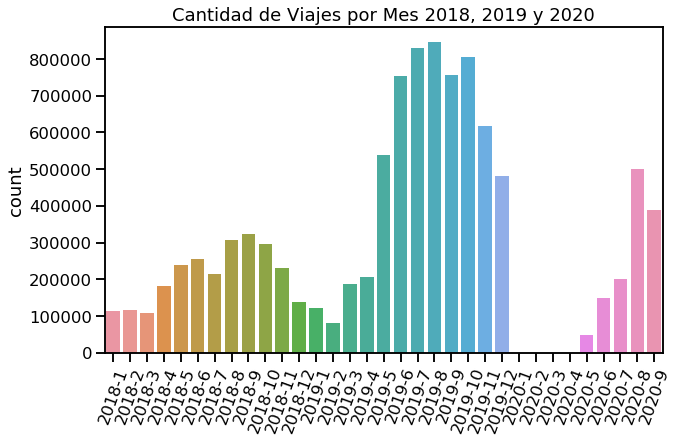

In [94]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(recorridos.aniomes.values,order=['2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10','2018-11','2018-12','2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12','2020-1','2020-2','2020-3','2020-4','2020-5','2020-6','2020-7','2020-8','2020-9'])
plt.title("Cantidad de Viajes por Mes 2018, 2019 y 2020")
plt.xticks(rotation=70)
plt.show()

In [95]:
# filtramos recorridos por el mes que mas tuvo viajes, agosto 2019
recorridos_ago19 = recorridos.loc[recorridos.aniomes == '2019-8']
recorridos_ago19

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,fecha_destino_recorrido,id_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,...,long_destino,Fecha_str,DiaSem,anio,mes,dia,franja_horaria,aniomes,nombre_estacion_origen_min,nombre_estacion_destino_min
6677104,2015,172,2019-08-01 00:00:00,2019-08-01 0:33,302,200688,San telmo,16.0,-34.625426,-58.371082,...,-58.371082,2019-08-01,Jueves,2019,8,1,0,2019-8,brasil,plaza nueva pompeya
6677105,1793,172,2019-08-05 14:07:00,2019-08-05 14:37,302,52803,San telmo,16.0,-34.625426,-58.371082,...,-58.371082,2019-08-05,Lunes,2019,8,5,14,2019-8,brasil,plaza nueva pompeya
6677106,2103,172,2019-08-12 13:51:00,2019-08-12 14:26,302,363422,San telmo,16.0,-34.625426,-58.371082,...,-58.371082,2019-08-12,Lunes,2019,8,12,13,2019-8,brasil,plaza nueva pompeya
6677107,2612,172,2019-08-13 17:17:00,2019-08-13 18:01,302,450810,San telmo,16.0,-34.625426,-58.371082,...,-58.371082,2019-08-13,Martes,2019,8,13,17,2019-8,brasil,plaza nueva pompeya
6677108,1644,172,2019-08-15 14:30:00,2019-08-15 14:57,302,52803,San telmo,16.0,-34.625426,-58.371082,...,-58.371082,2019-08-15,Jueves,2019,8,15,14,2019-8,brasil,plaza nueva pompeya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184151,2,53,2019-08-14 18:45:00,2019-08-14 18:45,283,175189,Retiro,0.0,-34.595881,-58.374282,...,-58.374282,2019-08-14,Miercoles,2019,8,14,18,2019-8,ricardo rojas,baldomero
10184153,2528,57,2019-08-12 00:01:00,2019-08-12 0:43,283,182137,Monserrat,0.0,-34.613385,-58.370577,...,-58.370577,2019-08-12,Lunes,2019,8,12,0,2019-8,belgrano,baldomero
10184154,2670,57,2019-08-14 12:30:00,2019-08-14 13:14,283,341185,Monserrat,0.0,-34.613385,-58.370577,...,-58.370577,2019-08-14,Miercoles,2019,8,14,12,2019-8,belgrano,baldomero
10184155,2545,127,2019-08-22 13:35:00,2019-08-22 14:18,283,298488,Chacarita,0.0,-34.592212,-58.452927,...,-58.452927,2019-08-22,Jueves,2019,8,22,13,2019-8,santos dumont y otero,baldomero


In [96]:
#Vamos a ver que cantidad de viajes hay por dia, por estacion origen
recorridos_ago19_pivot = pd.pivot_table(data = recorridos_ago19, values = ['id_usuario'], index = ['DiaSem'], columns = ['nombre_estacion_origen_min'], aggfunc='count', )
recorridos_ago19_pivot

id_usuario                             \
nombre_estacion_origen_min  15 de noviembre  25 de mayo  33 orientales   
DiaSem                                                                   
Domingo                                 135          66            137   
Jueves                                  223         396            292   
Lunes                                   181         267            191   
Martes                                  177         305            234   
Miercoles                               176         335            224   
Sabado                                  165          97            193   
Viernes                                 192         331            211   

                                                                    \
nombre_estacion_origen_min  9 de julio  acevedo  acuña de figueroa   
DiaSem                                                               
Domingo                             86      371                377   
Jueves                             291      784                783   
Lunes                              212      587                597   
Martes                             216      646                646   
Miercoles                          269      642                615   
Sabado                             110      599                616   
Viernes                            259      780                686   

                                                                              \
nombre_estacion_origen_min  acuña de figueroa y potosi  aduana  agronomia ii   
DiaSem                                                                         
Domingo                                            102     131           139   
Jueves                                             252     565           275   
Lunes                                              173     360           197   
Martes                                             190     482           203   
Miercoles                                          176     449           201   
Sabado                                             177     171           235   
Viernes                                            207     503           244   

                                    ...                               \
nombre_estacion_origen_min  aguero  ...  villarroel  virrey cevallos   
DiaSem                              ...                                
Domingo                        264  ...         240              353   
Jueves                         427  ...         469              687   
Lunes                          326  ...         329              522   
Martes                         325  ...         327              523   
Miercoles                      318  ...         336              551   
Sabado                         341  ...         341              436   
Viernes                        371  ...         407              539   

                                                                           \
nombre_estacion_origen_min  virrey liniers  yatay  061  131  288 balcarce   
DiaSem                                                                      
Domingo                                198    330  165  189  146      118   
Jueves                                 371    669  536  779  234      344   
Lunes                                  262    462  476  473  142      228   
Martes                                 263    535  426  601  167      277   
Miercoles                              302    514  536  548  173      249   
Sabado                                 238    496  207  315  187      146   
Viernes                                302    618  507  587  210      276   

                                                                   
nombre_estacion_origen_min club ciudad de buenos aires planetario  
DiaSem                                                             
Domingo                                            345        186  
Jueves                    

In [97]:
#print(np.sort(recorridos_ago19["nombre_estacion_origen_min"].unique()))

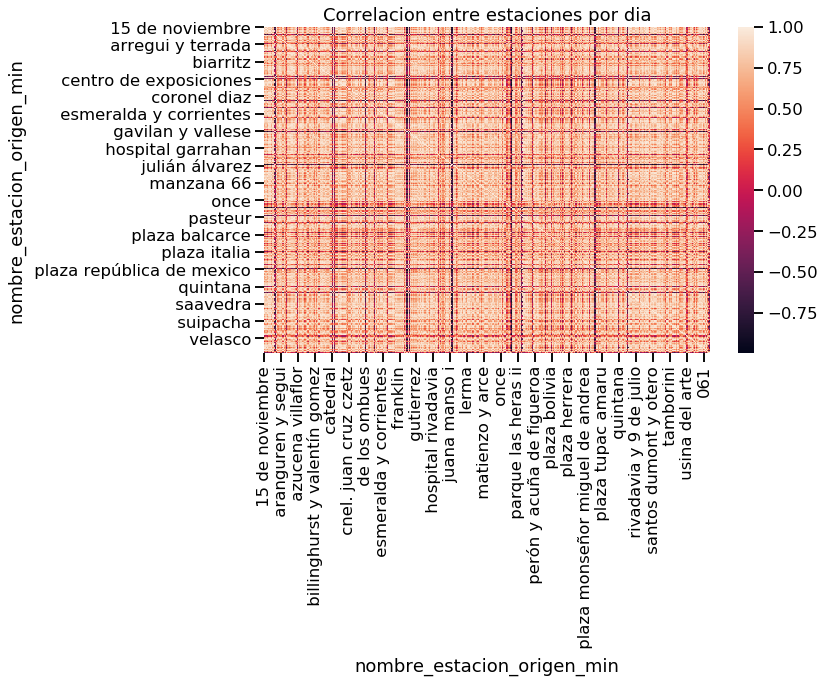

In [98]:
#Vamos a ver como correlacionan las estaciones entre si a traves de los dias
plt.figure(figsize=(10,6))
sns.heatmap(recorridos_ago19_pivot.id_usuario.corr(),)
plt.title("Correlacion entre estaciones por dia")
plt.show()

In [99]:
#Son demasiadas! A simple vista podemos ver que algunas correlacionan de forma positiva y otras de forma negativa

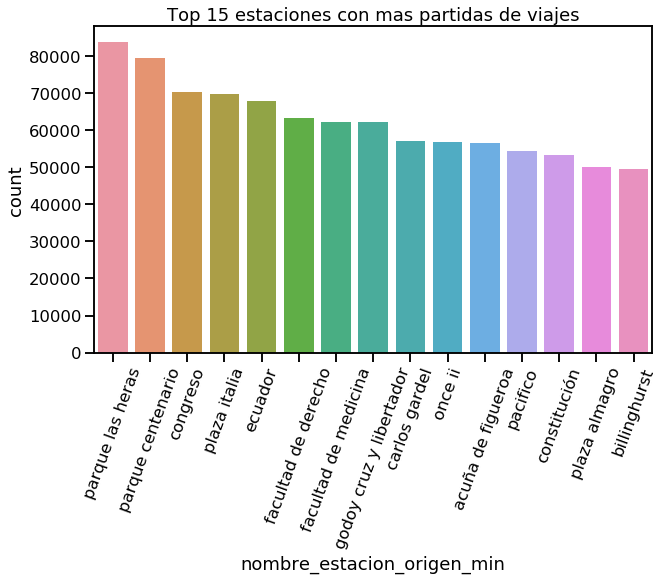

In [100]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_origen_min",data=recorridos, 
            order=recorridos.nombre_estacion_origen_min.value_counts().iloc[:15].index)
plt.title("Top 15 estaciones con mas partidas de viajes")
plt.xticks(rotation=70)
plt.show()

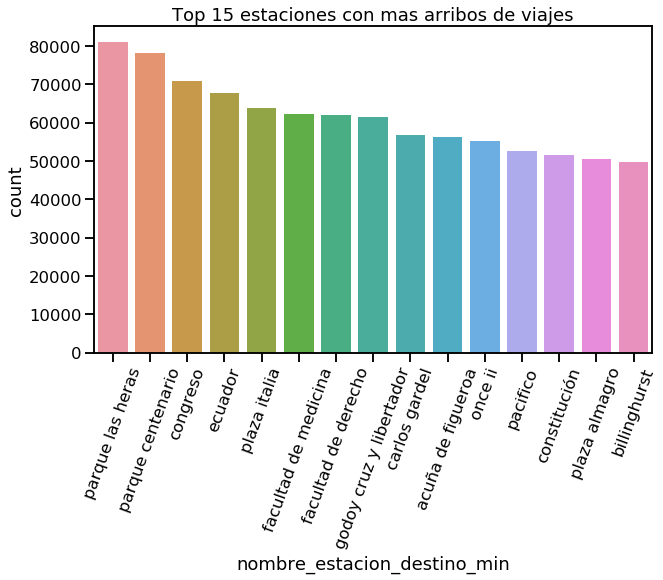

In [101]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_destino_min",data=recorridos, 
            order=recorridos.nombre_estacion_destino_min.value_counts().iloc[:15].index)
plt.title("Top 15 estaciones con mas arribos de viajes")
plt.xticks(rotation=70)
plt.show()

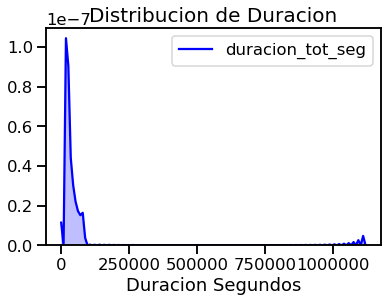

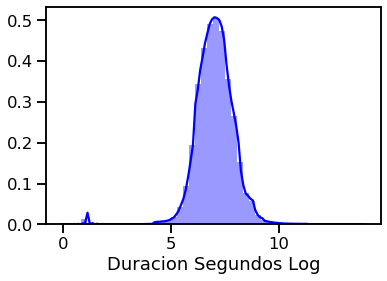

In [102]:
#Vamos a analizar ahora las duraciones de los viajes 
#Creamos columna nueva
recorridos['log_duracion'] = np.log(1+recorridos['duracion_tot_seg'])

#Plot Duracion en escala lineal
sns.kdeplot(recorridos.duracion_tot_seg, color="b", shade = True)
plt.xlabel("Duracion Segundos")
plt.title('Distribucion de Duracion',size = 20)
plt.show()

#Plot Log-Duracion en escala logarítimica, acá obtenemos mejores resultados con todo lo que sea machine learning 
sns.distplot(recorridos['log_duracion'],color='b')
plt.xlabel("Duracion Segundos Log")
plt.show()


In [103]:
#Vamos a comparar las duraciones por estacion origen de nuestro top ten de estaciones con mas viajes
# filtramos recorridos por las estaciones con mas viajes
recorridostop15origen= recorridos.loc[(recorridos['nombre_estacion_origen_min']== 'parque las heras') | (recorridos['nombre_estacion_origen_min']== 'parque centenario')| (recorridos['nombre_estacion_origen_min']== 'facultad de derecho')| (recorridos['nombre_estacion_origen_min']== 'constitucion')| (recorridos['nombre_estacion_origen_min']== 'once ii')| (recorridos['nombre_estacion_origen_min']== 'plaza almagro')| (recorridos['nombre_estacion_origen_min']== 'billinghurtst')| (recorridos['nombre_estacion_origen_min']== 'congreso')| (recorridos['nombre_estacion_origen_min']== 'plaza italia')| (recorridos['nombre_estacion_origen_min']== 'ecuador')| (recorridos['nombre_estacion_origen_min']== 'facultad de medicina')| (recorridos['nombre_estacion_origen_min']== 'godoy cruz y libertador')| (recorridos['nombre_estacion_origen_min']== 'carlos gardel')| (recorridos['nombre_estacion_origen_min']== 'acuña de figueroa')| (recorridos['nombre_estacion_origen_min']== 'pacifico')]
recorridostop15origen

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,fecha_destino_recorrido,id_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,...,Fecha_str,DiaSem,anio,mes,dia,franja_horaria,aniomes,nombre_estacion_origen_min,nombre_estacion_destino_min,log_duracion
14,584,5,2018-01-01 00:33:53,2018-01-01 00:43:37,142,158706,Palermo,42.0,-34.580550,-58.420954,...,2018-01-01,Lunes,2018,1,1,0,2018-1,plaza italia,armenia y gorriti,6.371612
18,3606,5,2018-01-01 00:49:26,2018-01-01 01:49:32,194,366959,Palermo,42.0,-34.580550,-58.420954,...,2018-01-01,Lunes,2018,1,1,0,2018-1,plaza italia,perón y francisco acuña de figueroa,8.190632
42,1754,54,2018-01-01 01:45:42,2018-01-01 02:14:56,25,417673,Almagro,20.0,-34.598118,-58.421984,...,2018-01-01,Lunes,2018,1,1,1,2018-1,acuña de figueroa,plaza güemes,7.470224
51,1394,54,2018-01-01 01:53:31,2018-01-01 02:16:45,30,30677,Almagro,20.0,-34.598118,-58.421984,...,2018-01-01,Lunes,2018,1,1,1,2018-1,acuña de figueroa,peña,7.240650
89,2235,160,2018-01-01 03:12:33,2018-01-01 03:49:48,136,435522,Palermo,0.0,-34.572962,-58.420210,...,2018-01-01,Lunes,2018,1,1,3,2018-1,godoy cruz y libertador,acevedo,7.712444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677017,1362,33,2019-07-31 23:53:48,2019-08-01 00:16:30,175,95193,Recoleta,20.0,-34.597091,-58.398981,...,2019-07-31,Miercoles,2019,7,31,23,2019-7,facultad de medicina,constitución,7.217443
6677033,822,5,2019-07-31 23:55:02,2019-08-01 00:08:44,364,224013,Palermo,42.0,-34.580550,-58.420954,...,2019-07-31,Miercoles,2019,7,31,23,2019-7,plaza italia,matienzo y arce,6.712956
6677057,1095,5,2019-07-31 23:56:04,2019-08-01 00:14:19,85,257068,Palermo,42.0,-34.580550,-58.420954,...,2019-07-31,Miercoles,2019,7,31,23,2019-7,plaza italia,aguero,6.999422
6677072,1476,29,2019-07-31 23:57:53,2019-08-01 00:22:29,167,415867,Caballito,30.0,-34.607941,-58.433557,...,2019-07-31,Miercoles,2019,7,31,23,2019-7,parque centenario,plaza 24 de septiembre,7.297768


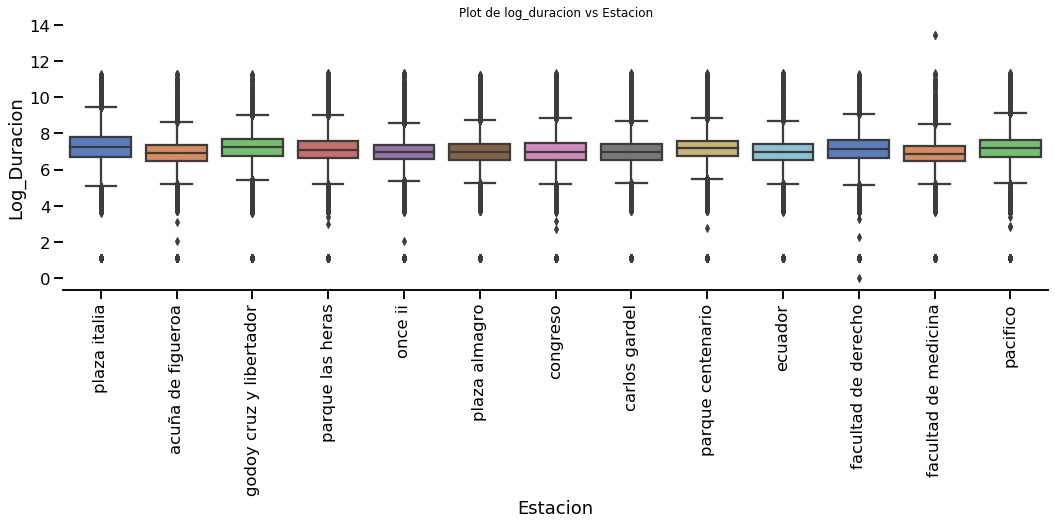

In [104]:
#Vamos a comparar la duracion por estacion del top 15 origen
g = sns.catplot(x='nombre_estacion_origen_min',y='log_duracion',data=recorridostop15origen, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("Estacion")
plt.ylabel("Log_Duracion")
plt.title('Plot de log_duracion vs Estacion',size = 12)
plt.show()

In [105]:
#Parecería ser que los viajes mas largos del top 15 son los que salen de plaza italia, la media es muy parecida. 

In [117]:
recorridosmapa=recorridos.loc[:, ['lat_origen', 'long_origen', 'barrio_origen', 'anio']]

In [118]:
recorridosmapa

,lat_origen,long_origen,barrio_origen,anio
0,-34.601864,-58.386693,San nicolas,2018
1,-34.588689,-58.385211,Retiro,2018
2,-34.583735,-58.401080,Palermo,2018
3,-34.604969,-58.363000,Puerto madero,2018
4,-34.604969,-58.363000,Puerto madero,2018
...,...,...,...,...
10184168,NaN,NaN,NaN,2019
10184169,NaN,NaN,NaN,2019
10184170,NaN,NaN,NaN,2019
10184171,NaN,NaN,NaN,2019


In [119]:
#eliminamos nulos
recorridosmapa=recorridosmapa.dropna()

In [120]:
# filtramos recorridos 2020
recorridosmapa = recorridosmapa.loc[recorridosmapa.anio == 2020]
recorridosmapa

,lat_origen,long_origen,barrio_origen,anio
2520545,-34.612298,-58.398987,Balvanera,2020
2520546,-34.572132,-58.411323,Palermo,2020
2520547,-34.599565,-58.442536,Villa crespo,2020
2520548,-34.577590,-58.407470,Palermo,2020
2520549,-34.610583,-58.380894,Monserrat,2020
...,...,...,...,...
3959393,-34.585443,-58.407741,Palermo,2020
3959394,-34.587617,-58.455212,Chacarita,2020
3959395,-34.584912,-58.437252,Palermo,2020
3959396,-34.584912,-58.437252,Palermo,2020


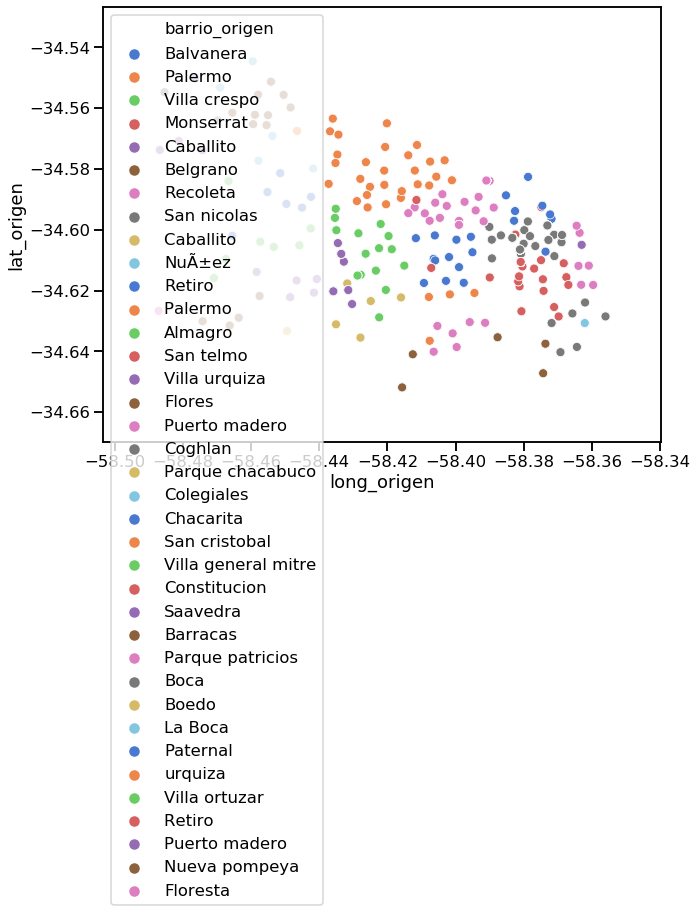

In [121]:
plt.figure(figsize=(10,8))
sns.scatterplot(recorridosmapa.long_origen,recorridosmapa.lat_origen,hue=recorridosmapa.barrio_origen,palette='muted')
plt.show()

In [127]:
recorridosmapaduracion=recorridos.loc[:, ['lat_origen', 'long_origen', 'log_duracion', 'anio']]

In [128]:
#eliminamos nulos
recorridosmapaduracion=recorridosmapaduracion.dropna()

In [129]:
# filtramos recorridos 2020
recorridosmapaduracion = recorridosmapaduracion.loc[recorridosmapaduracion.anio == 2020]
recorridosmapaduracion

,lat_origen,long_origen,log_duracion,anio
2520545,-34.612298,-58.398987,5.857933,2020
2520546,-34.572132,-58.411323,4.454347,2020
2520547,-34.599565,-58.442536,5.743003,2020
2520548,-34.577590,-58.407470,6.120297,2020
2520549,-34.610583,-58.380894,5.278115,2020
...,...,...,...,...
3959393,-34.585443,-58.407741,6.993933,2020
3959394,-34.587617,-58.455212,5.673323,2020
3959395,-34.584912,-58.437252,1.098612,2020
3959396,-34.584912,-58.437252,1.098612,2020


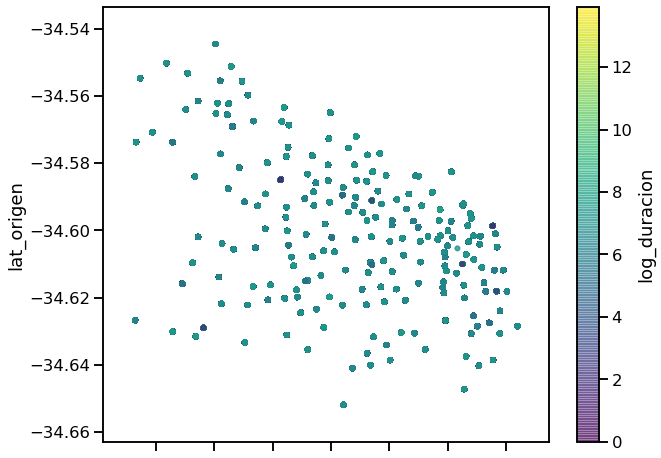

In [130]:
recorridosmapaduracion.plot(kind='scatter', x='long_origen', y='lat_origen', c='log_duracion',
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(10,8))
plt.show()